<a href="https://colab.research.google.com/github/peshqa/MMO_lab/blob/main/lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [217]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [218]:
import pandas as pd

In [219]:
import matplotlib.pyplot as plt
%matplotlib inline

In [220]:
%%capture
!wget https://www.dropbox.com/scl/fi/6yxtfx99ue5zp1qd5cwa9/.xls?rlkey=rk0sfu22pzytup3dryt8x95ag&dl=1

In [221]:
training_data = pd.read_excel('.xls?rlkey=rk0sfu22pzytup3dryt8x95ag')

In [222]:
training_data.head()

,price,abtest,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15
0,10000,control,2016,manuell,174,andere,150000,5,NaN,volkswagen,nein,NaN,NaT,NaN,NaN,NaT
1,8500,control,2016,manuell,0,andere,150000,1,diesel,renault,ja,NaN,NaT,NaN,NaN,NaT
2,6666,control,2016,manuell,209,andere,150000,11,benzin,audi,nein,NaN,NaT,NaN,NaN,NaT
3,6500,control,2016,manuell,120,andere,90000,0,NaN,peugeot,nein,NaN,NaT,NaN,NaN,NaT
4,6000,control,2016,automatik,167,andere,150000,3,benzin,hyundai,nein,NaN,NaT,NaN,NaN,NaT


In [223]:
y = 'price'

In [224]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

training_data = training_data.drop(training_data.columns[11:16], axis=1)
training_data = training_data[training_data[y] > 10]
training_data = training_data[training_data[y] < 50000]
#training_data['notRepairedDamage'].replace({'nein': 0, 'ja': 1}, inplace=True)
#training_data['gearbox'].replace({'manuell': 0, 'automatik': 1}, inplace=True)
for t in ['abtest', 'gearbox', 'model', 'fuelType', 'brand', 'notRepairedDamage']:
  training_data[t] = le.fit_transform(training_data[t])
#training_data = training_data.apply(pd.to_numeric, errors='coerce')
#training_data.fillna(0, inplace=True)
training_data.head()

,price,abtest,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage
0,10000,0,2016,1,174,0,150000,5,7,38,1
1,8500,0,2016,1,0,0,150000,1,3,27,0
2,6666,0,2016,1,209,0,150000,11,1,1,1
3,6500,0,2016,1,120,0,90000,0,7,25,1
4,6000,0,2016,0,167,0,150000,3,1,12,1


In [225]:
test_data = training_data[int(training_data.shape[0]*0.85):]
training_data = training_data[:int(training_data.shape[0]*0.85)]

In [226]:
training_data.head()

,price,abtest,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage
0,10000,0,2016,1,174,0,150000,5,7,38,1
1,8500,0,2016,1,0,0,150000,1,3,27,0
2,6666,0,2016,1,209,0,150000,11,1,1,1
3,6500,0,2016,1,120,0,90000,0,7,25,1
4,6000,0,2016,0,167,0,150000,3,1,12,1


In [227]:
training_data.shape

(40150, 11)

In [228]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40150 entries, 0 to 40776
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   price                40150 non-null  int64
 1   abtest               40150 non-null  int64
 2   yearOfRegistration   40150 non-null  int64
 3   gearbox              40150 non-null  int64
 4   powerPS              40150 non-null  int64
 5   model                40150 non-null  int64
 6   kilometer            40150 non-null  int64
 7   monthOfRegistration  40150 non-null  int64
 8   fuelType             40150 non-null  int64
 9   brand                40150 non-null  int64
 10  notRepairedDamage    40150 non-null  int64
dtypes: int64(11)
memory usage: 3.7 MB


In [229]:
training_values = training_data[y]

In [230]:
training_points = training_data.drop(y, axis=1)

In [231]:
training_points.head()

,abtest,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage
0,0,2016,1,174,0,150000,5,7,38,1
1,0,2016,1,0,0,150000,1,3,27,0
2,0,2016,1,209,0,150000,11,1,1,1
3,0,2016,1,120,0,90000,0,7,25,1
4,0,2016,0,167,0,150000,3,1,12,1


In [232]:
training_points.shape

(40150, 10)

In [233]:
from sklearn import linear_model, ensemble

In [234]:
linear_regression_model = linear_model.LinearRegression()

In [235]:
random_forest_model = ensemble.RandomForestRegressor()

In [236]:
linear_regression_model.fit(training_points, training_values)

LinearRegression()

In [237]:
random_forest_model.fit(training_points, training_values)

RandomForestRegressor()

In [238]:
#test_data = pd.read_excel('predict_house_price_test_data.xlsx')

In [239]:
test_data.head()

,price,abtest,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage
40777,6900,0,2006,0,170,172,150000,7,3,38,1
40778,6750,0,2006,1,105,172,150000,12,3,38,1
40779,6740,0,2006,0,140,172,150000,9,3,38,1
40780,6700,0,2006,0,170,172,150000,4,3,38,1
40781,6700,0,2006,1,105,172,125000,4,3,38,1


In [240]:
test_data.shape

(7086, 11)

In [241]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7086 entries, 40777 to 48030
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   price                7086 non-null   int64
 1   abtest               7086 non-null   int64
 2   yearOfRegistration   7086 non-null   int64
 3   gearbox              7086 non-null   int64
 4   powerPS              7086 non-null   int64
 5   model                7086 non-null   int64
 6   kilometer            7086 non-null   int64
 7   monthOfRegistration  7086 non-null   int64
 8   fuelType             7086 non-null   int64
 9   brand                7086 non-null   int64
 10  notRepairedDamage    7086 non-null   int64
dtypes: int64(11)
memory usage: 664.3 KB


In [242]:
test_values = test_data[y]

In [243]:
test_points = test_data.drop(y, axis=1)

In [244]:
test_points.head()

,abtest,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage
40777,0,2006,0,170,172,150000,7,3,38,1
40778,0,2006,1,105,172,150000,12,3,38,1
40779,0,2006,0,140,172,150000,9,3,38,1
40780,0,2006,0,170,172,150000,4,3,38,1
40781,0,2006,1,105,172,125000,4,3,38,1


In [245]:
test_points.shape

(7086, 10)

In [246]:
test_predictions_linear = linear_regression_model.predict(test_points)
test_predictions_random_forest = random_forest_model.predict(test_points)

In [247]:
test_values.mean()

11610.911515664691

Text(0, 0.5, 'Предсказанная цена')

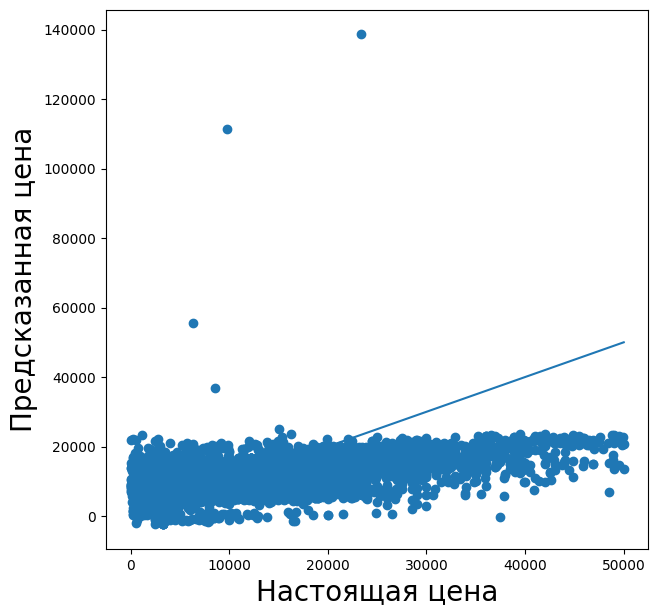

In [261]:
plt.figure(figsize=(7,7))
plt.scatter(test_values, test_predictions_linear)
plt.plot([0, 5*10**4], [0,5*10**4])
plt.xlabel('Настоящая цена', fontsize=20)
plt.ylabel('Предсказанная цена', fontsize=20)

Text(0, 0.5, 'Предсказанная цена')

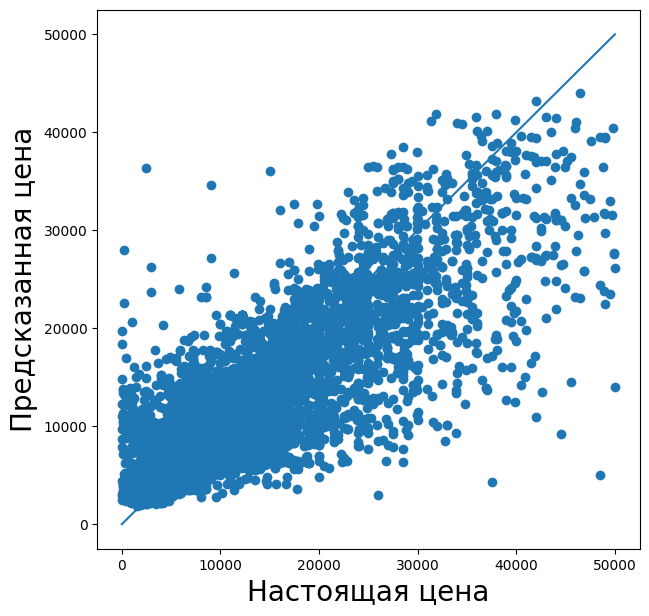

In [260]:
plt.figure(figsize=(7,7))
plt.scatter(test_values, test_predictions_random_forest)
plt.plot([0, 5*10**4], [0,5*10**4])
plt.xlabel('Настоящая цена', fontsize=20)
plt.ylabel('Предсказанная цена', fontsize=20)

In [250]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [251]:
mean_absolute_error_linear_model = mean_absolute_error(test_values, test_predictions_linear)
mean_squared_error_linear_model = mean_squared_error(test_values, test_predictions_linear)

In [252]:
mean_absolute_error_random_forest = mean_absolute_error(test_values, test_predictions_random_forest)
mean_squared_error_random_forest = mean_squared_error(test_values, test_predictions_random_forest)

In [253]:
import numpy as np
print('MAE: {0:7.2f}, RMSE: {1:7.2f} для модели линейной регрессии'.format(
    mean_absolute_error_linear_model,
    np.sqrt(mean_absolute_error_linear_model)
))
print('MAE: {0:7.2f}, RMSE: {1:7.2f} для модели случайного леса'.format(
    mean_absolute_error_random_forest,
    np.sqrt(mean_absolute_error_random_forest)
))

MAE: 5768.34, RMSE:   75.95 для модели линейной регрессии
MAE: 3695.90, RMSE:   60.79 для модели случайного леса


In [254]:
random_forest_model.feature_importances_

array([0.        , 0.1708759 , 0.01898113, 0.49541078, 0.04293096,
       0.1622751 , 0.02965189, 0.01210211, 0.05608081, 0.01169132])

In [255]:
feature_importance = pd.DataFrame(columns=['Название признака', 'Важность признака'])

In [256]:
feature_importance['Название признака'] = training_points.keys()
feature_importance['Важность признака'] = random_forest_model.feature_importances_
feature_importance

,Название признака,Важность признака
0,abtest,0.000000
1,yearOfRegistration,0.170876
2,gearbox,0.018981
3,powerPS,0.495411
4,model,0.042931
5,kilometer,0.162275
6,monthOfRegistration,0.029652
7,fuelType,0.012102
8,brand,0.056081
9,notRepairedDamage,0.011691


In [257]:
feature_importance.sort_values(by='Важность признака', ascending=False)

,Название признака,Важность признака
3,powerPS,0.495411
1,yearOfRegistration,0.170876
5,kilometer,0.162275
8,brand,0.056081
4,model,0.042931
6,monthOfRegistration,0.029652
2,gearbox,0.018981
7,fuelType,0.012102
9,notRepairedDamage,0.011691
0,abtest,0.000000


powerPS (лошадиные силы) - самый влиятельный признак